# TP7 : Modélisation de l'Arrière-Plan avec OpenCV

In [1]:
!pip install opencv-python

import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline


print("Veuillez télécharger une vidéo (ex. video.mp4, durée 10-30 secondes)")
uploaded = files.upload()
video_path = list(uploaded.keys())[0]  # Obtenir le nom du fichier téléchargé

# Initialisation du flux vidéo
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Erreur d'ouverture de la vidéo")
    exit()

# Obtenir les propriétés de la vidéo
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Fonction pour traiter la vidéo avec des paramètres donnés et sauvegarder le résultat
def process_video(subtractor, output_filename, apply_morphology=False, kernel=None):
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)  # Revenir au début de la vidéo

    # Définir le codec et créer un objet VideoWriter pour sauvegarder la vidéo
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_filename, fourcc, fps, (width, height), isColor=False)

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print(f"Fin de la vidéo ou erreur de lecture pour {output_filename}")
            break

        # Appliquer la soustraction sur chaque frame
        fgmask = subtractor.apply(frame)

        # Appliquer une opération morphologique si spécifié (pour Activité 3)
        if apply_morphology and kernel is not None:
            fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_CLOSE, kernel)

        # Écrire le masque dans la vidéo de sortie
        out.write(fgmask)

        frame_count += 1
        if frame_count % 100 == 0:
            print(f"Traitement de {output_filename} : {frame_count}/{total_frames} frames")

    out.release()
    return output_filename

Veuillez télécharger une vidéo (ex. video.mp4, durée 10-30 secondes)


Saving video_cars.mp4 to video_cars.mp4


## 1. Modélisation de l'arrière-plan par MOG

In [7]:
# Tester avec différents paramètres
params_mog2_1 = [
    {"history": 200, "varThreshold": 16, "detectShadows": False, "output": "output_mog2_act1_1.avi"},
    {"history": 50, "varThreshold": 10, "detectShadows": True, "output": "output_mog2_act1_2.avi"}
]

for param in params_mog2_1:
    fgbg = cv2.createBackgroundSubtractorMOG2(
        history=param["history"],
        varThreshold=param["varThreshold"],
        detectShadows=param["detectShadows"]
    )
    output_file = process_video(fgbg, param["output"])
    print(f"Vidéo sauvegardée : {output_file}")
    files.download(output_file)


Vidéo sauvegardée : output_mog2_act1_1.avi


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Vidéo sauvegardée : output_mog2_act1_2.avi


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Évaluation des paramètres pour Activité 1 (MOG via MOG2) :
- history : 200 (stable), 50 (rapide adaptation).
  Impact : Une history élevée (200) donne une modélisation robuste mais lente ; une history faible (50) est plus réactive mais peut inclure du bruit.
- varThreshold : 16 (défaut), 10 (sensible).
  Impact : Un varThreshold bas (10) augmente la sensibilité (plus d'objets détectés) mais ajoute du bruit ; 16 est un bon équilibre.
- detectShadows : False (désactivé), True (activé).
  Impact : True détecte les ombres (utile en éclairage variable), mais peut inclure des fausses détections ; False réduit le bruit dans des scènes stables.

In [8]:
# Activité 2 : Modélisation de l'arrière-plan par MOG2
# Tester avec différents paramètres
params_mog2_2 = [
    {"history": 100, "varThreshold": 10, "detectShadows": True, "output": "output_mog2_act2_1.avi"},
    {"history": 500, "varThreshold": 16, "detectShadows": True, "output": "output_mog2_act2_2.avi"},
    {"history": 1000, "varThreshold": 50, "detectShadows": False, "output": "output_mog2_act2_3.avi"}
]

for param in params_mog2_2:
    fgbg = cv2.createBackgroundSubtractorMOG2(
        history=param["history"],
        varThreshold=param["varThreshold"],
        detectShadows=param["detectShadows"]
    )
    output_file = process_video(fgbg, param["output"])
    print(f"Vidéo sauvegardée : {output_file}")
    #files.download(output_file)



Vidéo sauvegardée : output_mog2_act2_1.avi
Vidéo sauvegardée : output_mog2_act2_2.avi
Vidéo sauvegardée : output_mog2_act2_3.avi


Évaluation des paramètres pour Activité 2 (MOG2) :\n",
    "- history : 100 (rapide adaptation), 500 (stable), 1000 (robuste mais lent).",
    "  Impact : Plus élevé = meilleure modélisation mais moins réactif.",
    "- varThreshold : 16 (défaut), 10 (plus sensible), 50 (moins sensible).",
    "  Impact : Bas = plus de détection, mais plus de bruit ; Haut = moins de bruit, mais objets manqués.",
    "- detectShadows : True (détecte ombres), False (ignore ombres).",
    "  Impact : True améliore en éclairage variable, mais peut inclure fausses détections.",

In [9]:
# Activité 3 : Modélisation de l'arrière-plan par GMG (remplacé par KNN avec morphologie)
# Tester avec différents paramètres et éléments structurants
params_knn_3 = [
    {"history": 120, "dist2Threshold": 400, "detectShadows": True, "kernel_shape": cv2.MORPH_ELLIPSE, "kernel_size": (3, 3), "output": "output_knn_act3_1.avi"},
    {"history": 60, "dist2Threshold": 200, "detectShadows": True, "kernel_shape": cv2.MORPH_RECT, "kernel_size": (5, 5), "output": "output_knn_act3_2.avi"},
    {"history": 240, "dist2Threshold": 600, "detectShadows": False, "kernel_shape": cv2.MORPH_ELLIPSE, "kernel_size": (7, 7), "output": "output_knn_act3_3.avi"}
]

for param in params_knn_3:
    fgbg = cv2.createBackgroundSubtractorKNN(
        history=param["history"],
        dist2Threshold=param["dist2Threshold"],
        detectShadows=param["detectShadows"]
    )
    kernel = cv2.getStructuringElement(param["kernel_shape"], param["kernel_size"])
    output_file = process_video(fgbg, param["output"], apply_morphology=True, kernel=kernel)
    print(f"Vidéo sauvegardée : {output_file}")
   # files.download(output_file)


Vidéo sauvegardée : output_knn_act3_1.avi
Vidéo sauvegardée : output_knn_act3_2.avi
Vidéo sauvegardée : output_knn_act3_3.avi


Évaluation des paramètres pour Activité 3 (GMG via KNN) :
- history : 120 (simule initializationFrames), 60 (rapide), 240 (précis).
  Impact : Plus élevé = meilleur apprentissage initial, mais plus lent.
- dist2Threshold : 400 (simule decisionThreshold), 200 (sensible), 600 (strict).
  Impact : Bas = plus d'objets détectés, mais bruit ; Haut = moins de bruit, mais objets manqués.
- Éléments structurants :
  - Ellipse (3, 3) : Lissage modéré, adapté aux petits objets.
  - Rectangle (5, 5) : Affine les contours droits, utile pour des formes angulaires.
  - Ellipse (7, 7) : Lisse davantage, mais peut dilater excessivement les objets.

In [10]:
# Activité 4 : Modélisation de l'arrière-plan par KNN
# Tester avec différents paramètres
params_knn_4 = [
    {"history": 500, "dist2Threshold": 400, "detectShadows": True, "output": "output_knn_act4_1.avi"},
    {"history": 100, "dist2Threshold": 200, "detectShadows": True, "output": "output_knn_act4_2.avi"},
    {"history": 500, "dist2Threshold": 600, "detectShadows": False, "output": "output_knn_act4_3.avi"}
]

for param in params_knn_4:
    bg_subtractor = cv2.createBackgroundSubtractorKNN(
        history=param["history"],
        dist2Threshold=param["dist2Threshold"],
        detectShadows=param["detectShadows"]
    )
    output_file = process_video(bg_subtractor, param["output"])
    print(f"Vidéo sauvegardée : {output_file}")
   # files.download(output_file)



Vidéo sauvegardée : output_knn_act4_1.avi
Vidéo sauvegardée : output_knn_act4_2.avi
Vidéo sauvegardée : output_knn_act4_3.avi


Évaluation des paramètres pour Activité 4 (KNN) :
- history : 500 (stable, bonne modélisation), 100 (rapide adaptation).
  Impact : Grand history = robuste mais lent, petit = réactif mais bruit.
- dist2Threshold : 400 (défaut), 200 (précis), 600 (tolérant).
  Impact : Bas = sensible, mais bruit ; Haut = moins de bruit, mais objets manqués.
- detectShadows : True (utile en extérieur), False (en intérieur stable).
  Impact : True gère les ombres, mais peut fausser les détections.

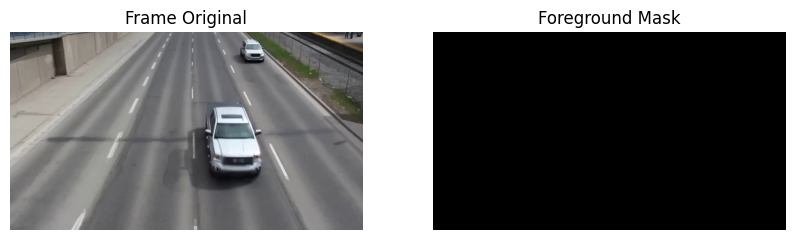

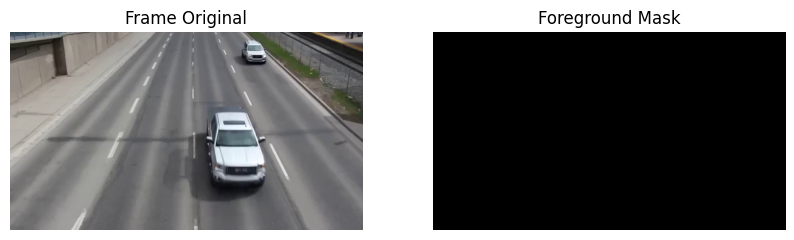

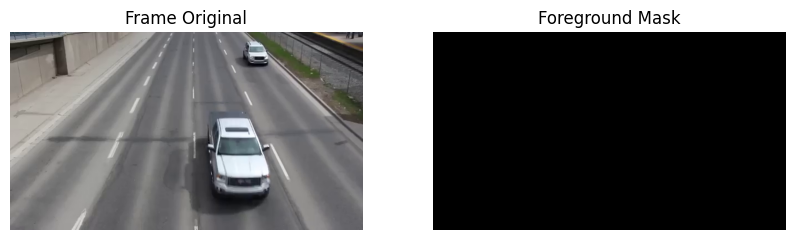

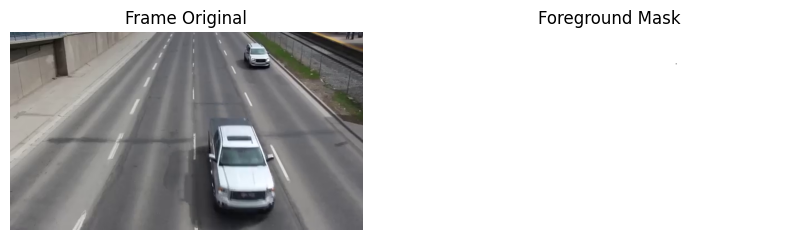

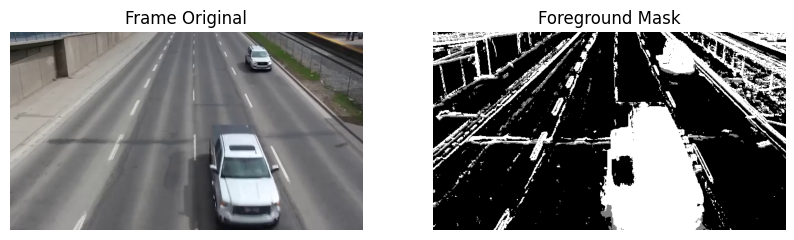

In [6]:
# Libérer les ressources
cap.release()

# Visualisation de quelques frames (optionnel)
# Afficher les 5 premières frames avec le masque pour la dernière configuration
cap = cv2.VideoCapture(video_path)
bg_subtractor = cv2.createBackgroundSubtractorKNN(history=500, dist2Threshold=400, detectShadows=True)

for i in range(5):
    ret, frame = cap.read()
    if not ret:
        break
    fgmask = bg_subtractor.apply(frame)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title('Frame Original')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(fgmask, cmap='gray')
    plt.title('Foreground Mask')
    plt.axis('off')
    plt.show()

cap.release()